In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (29)\BIKE DETAILS.csv")

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [7]:
numeric_cols = df.select_dtypes(include = ["float", "int64"]).columns
categorical_cols = df.select_dtypes(include = ["object"]).columns

In [9]:
df["ex_showroom_price"] = df["ex_showroom_price"].fillna(df["ex_showroom_price"].mean())

In [10]:
df.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [11]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058


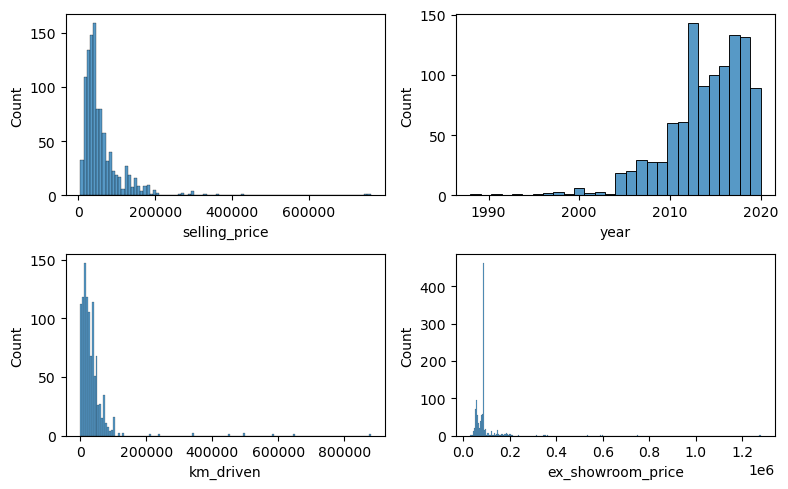

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (8, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.histplot(data = df, x = column, ax = axes[i])
plt.tight_layout()

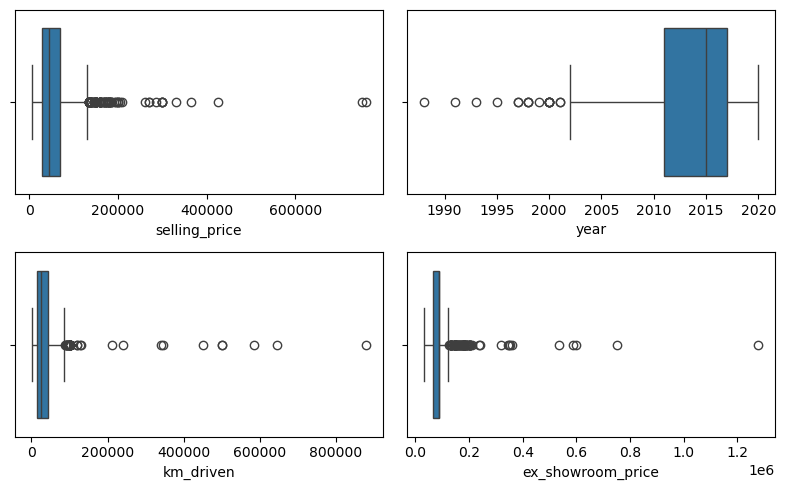

In [13]:
fig, axes = plt.subplots(2, 2, figsize = (8, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.boxplot(data = df, x = column, ax = axes[i])
plt.tight_layout()

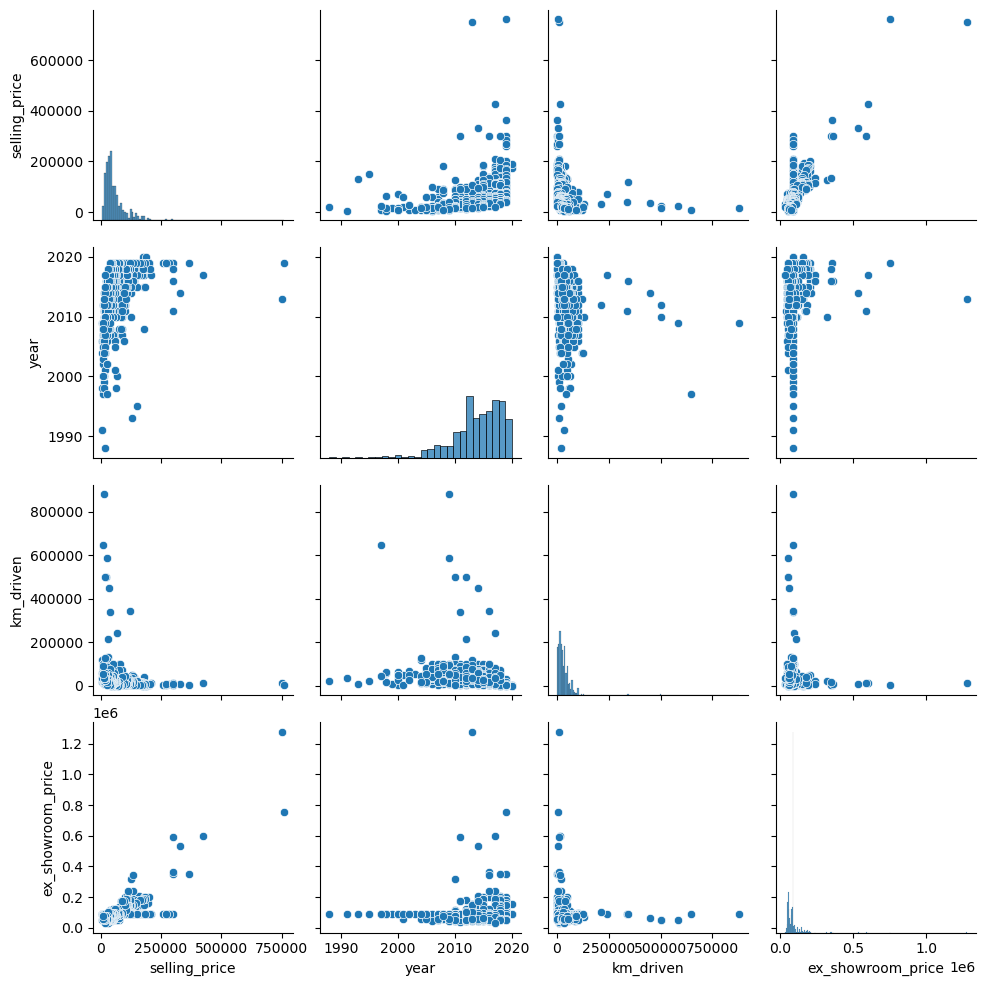

In [14]:
sns.pairplot(df)

In [15]:
df = df.drop("name", axis = 1)

<Axes: >

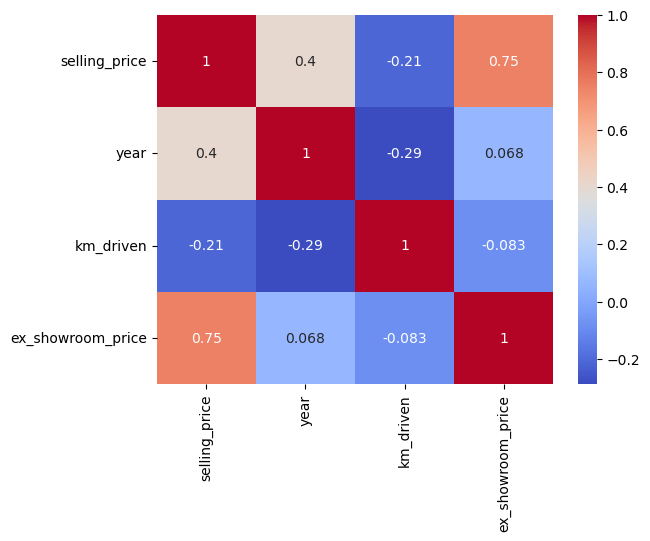

In [16]:
sns.heatmap(data = df[numeric_cols].corr(), cmap = "coolwarm", annot = True)

In [17]:
for col in df.select_dtypes(include=['float64', 'int64']):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

selling_price: 87 outliers
year: 18 outliers
km_driven: 39 outliers
ex_showroom_price: 83 outliers


In [18]:
for col in ['selling_price', 'year', 'km_driven', 'ex_showroom_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


AFTER APPLYING WINSORIZING

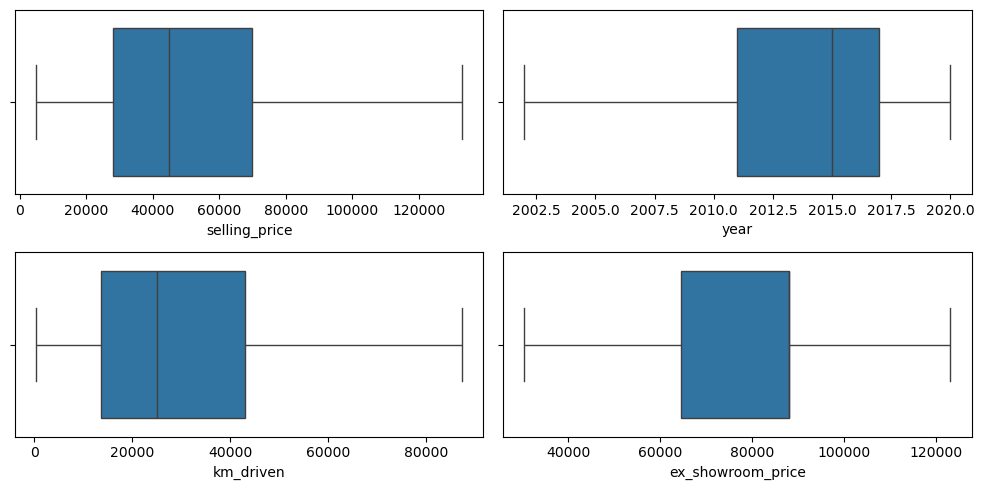

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (10, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.boxplot(data = df, x = column, ax = axes[i])
plt.tight_layout()

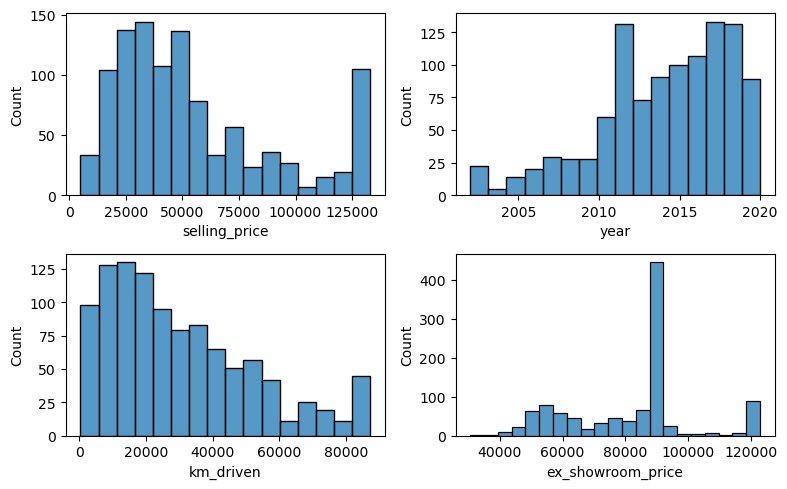

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (8, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.histplot(data = df, x = column, ax = axes[i])
plt.tight_layout()

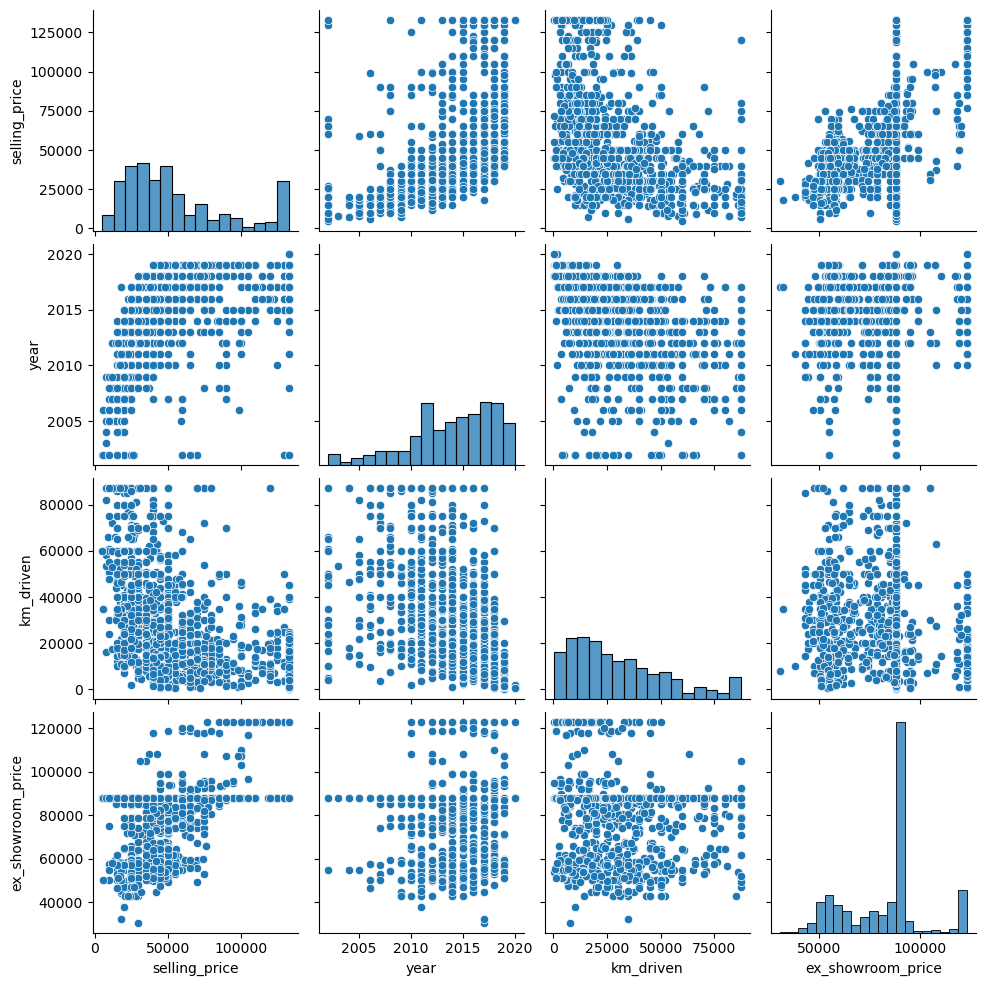

In [22]:
sns.pairplot(df)

<Axes: >

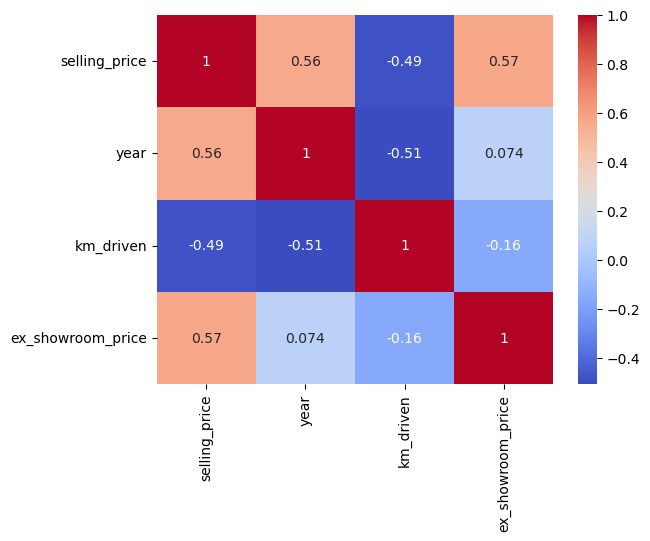

In [23]:
sns.heatmap(data = df[numeric_cols].corr(), cmap = "coolwarm", annot = True)

In [24]:
numeric_cols = df.select_dtypes(include = ["float", "int64"]).columns
categorical_cols = df.select_dtypes(include = ["object"]).columns

In [25]:
scaler = StandardScaler()

In [26]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [30]:
owner_mapping = {
    '1st owner': 0,
    '2nd owner': 1,
    '3rd owner': 2,
    '4th owner': 3
}

seller_type_mapping = {
    'Individual': 0,
    'Dealer': 1
}

# Apply the mappings to the columns
df['owner'] = df['owner'].map(owner_mapping)
df['seller_type'] = df['seller_type'].map(seller_type_mapping)

In [32]:
x = df.drop("selling_price", axis = 1)
y = df["selling_price"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 10)

In [37]:
model = LinearRegression()

In [39]:
model.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(x_train)

In [60]:
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

In [62]:
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MAE): {mse}")

R² Score: 0.6376895914437529
Mean Squared Error (MAE): 0.40367233838621436
